In [58]:
!pip install konlpy

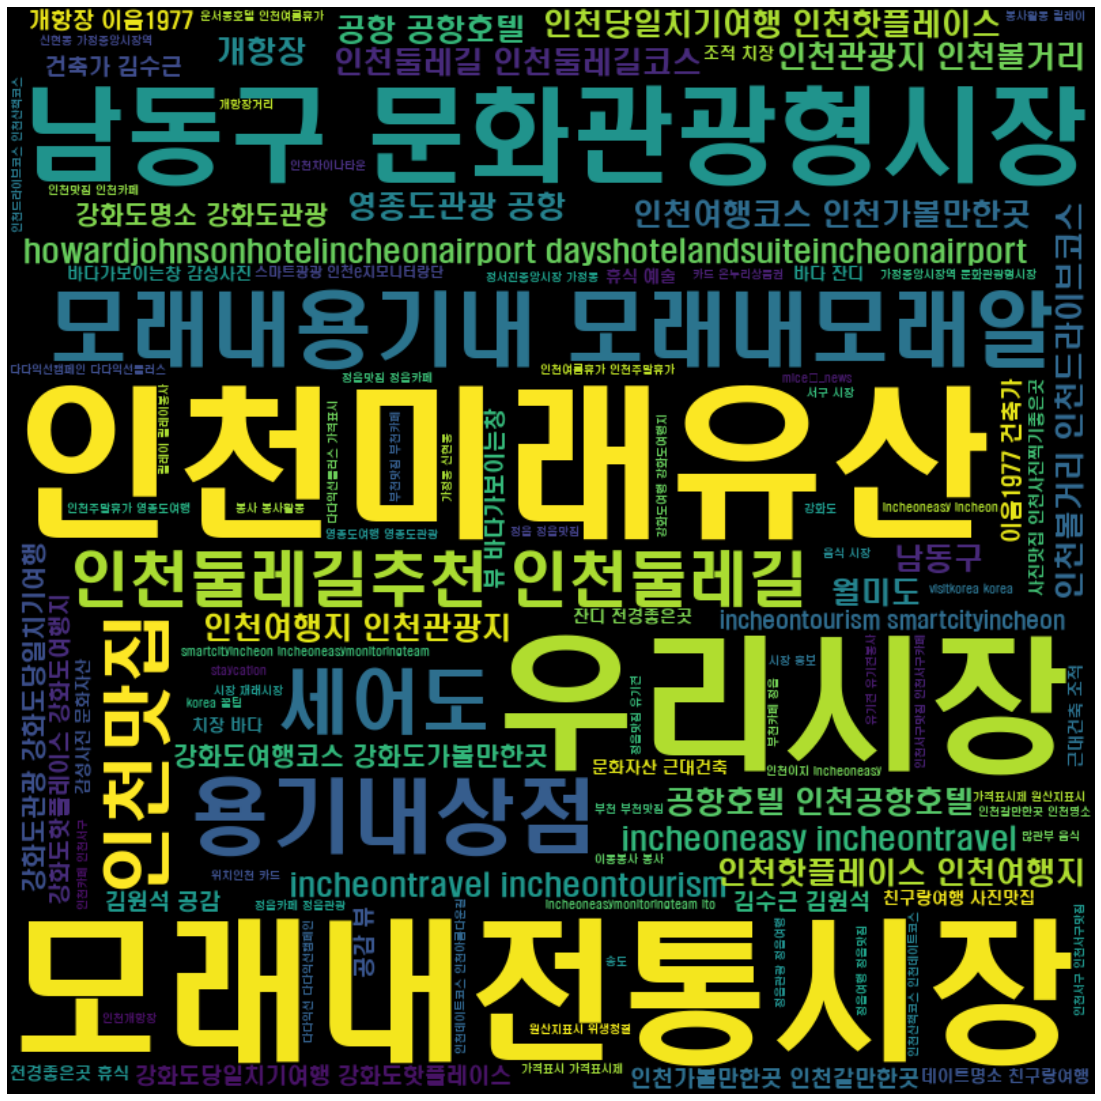

In [138]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

STOPWORDS.add('인천e지')
STOPWORDS.add('인천여행')
STOPWORDS.add('인천관광')
STOPWORDS.add('인천')
STOPWORDS.add('핫플레이스')
STOPWORDS.add('여행')
STOPWORDS.add('인천시')
STOPWORDS.add('인천광역시')
STOPWORDS.add('스마트관광')
STOPWORDS.add('문광형시장')
STOPWORDS.add('인천모래내시장')
STOPWORDS.add('모래내시장')
STOPWORDS.add('인천모래내전통시장')
STOPWORDS.add('전통시장')
STOPWORDS.add('인천관광공사')
STOPWORDS.add('모래알상점')
STOPWORDS.add('인천호텔')
STOPWORDS.add('영종도호텔')
STOPWORDS.add('인천여행지추천')
STOPWORDS.add('하워드존슨호텔인천공항')
STOPWORDS.add('하워드존슨호텔인천에어포트')
STOPWORDS.add('데이즈호텔앤스위트인천공항')
STOPWORDS.add('운서역호텔')
STOPWORDS.add('김포공항호텔')
STOPWORDS.add('데이즈호텔앤스위트인천에어포트')



df = pd.read_excel(r'C:/Users/kyj/Downloads/데이터마이닝/2022-11-01_about 인천관광 insta crawling.xlsx')

#https://gist.github.com/pybokeh/de5475328fb2bbb33cb7

####한국어 형태소 분석기####
from konlpy.tag import Kkma, Komoran, Okt, Hannanum #Mecab은 윈도우에서 작동 불가능
okt = Okt()
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()


text = ''
for row in df.tags.values:
    r1 = row.lower().rstrip(']')
    r2 = r1.lower().lstrip('[')
    text = text + r2.lower() + ' '

t1 = text.replace('#', '')
t2 = t1.replace(',', '')
t3 = t2.replace(' ', ', ')
t4 = t3.replace("'", '')
#korea_text = kkma.nouns(text)
#print(kkma.nouns(text))
# str_korea_text = str(korea_text)
# print(str_korea_text)

wc = WordCloud(max_words=250, 
               stopwords=STOPWORDS, font_path='C:\Windows\Fonts\\H2HDRM.ttf', width=400, height=400, scale=2.0)
# generate word cloud
wc.generate(t4)

# store to file
# wc.to_file(r'D:\temp\chassis.png')

# show
plt.figure(figsize=(20, 20))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

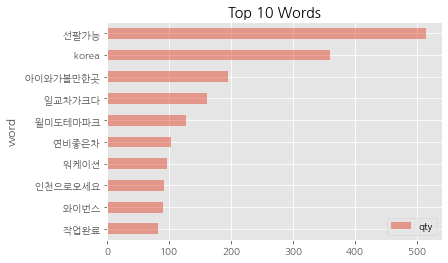

In [136]:
from collections import Counter

# word = []

# for item in wc.process_text(t4):
#     print(item)
#     w = item
#     word.append(w)
# print(word)

# count = Counter(word)
# lst_count = list(count.values())
# print(count)

# set_word = list(set(word))

lst_t4 = t4.split(',')
count = Counter(lst_t4)
lst_count = list(count.values())

set_lst_t4 = list(set(lst_t4))

word_freq = pd.DataFrame(data={'word':set_lst_t4, 'qty':lst_count})

top_x = 10

word_freq.sort_values(by='qty', ascending=False)[:top_x].set_index('word').sort_values(by='qty').plot.barh(alpha=0.5)
plt.title("Top " + str(top_x) + " Words")
plt.show()

In [137]:
word_freq[['word','qty']].sort_values(by='qty', ascending=False)[:50]

,word,qty
23,선팔가능,514
34,korea,359
20,아이와가볼만한곳,195
30,일교차가크다,162
32,월미도테마파크,127
68,연비좋은차,103
123,워케이션,96
133,인천으로오세요,92
127,와이번스,90
130,작업완료,82
